## Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Load Data

In [2]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv'
df = pd.read_csv(url)

## Look at first few rows

In [3]:
df.head(3)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0


## Initial Look at data set

In [4]:
## variable info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
total_cup_points         1339 non-null float64
species                  1339 non-null object
owner                    1332 non-null object
country_of_origin        1338 non-null object
farm_name                980 non-null object
lot_number               276 non-null object
mill                     1021 non-null object
ico_number               1182 non-null object
company                  1130 non-null object
altitude                 1113 non-null object
region                   1280 non-null object
producer                 1107 non-null object
number_of_bags           1339 non-null int64
bag_weight               1339 non-null object
in_country_partner       1339 non-null object
harvest_year             1292 non-null object
grading_date             1339 non-null object
owner_1                  1332 non-null object
variety                  1113 non-null object
processing_method    

In [5]:
## data frame rows x columns

df.shape

(1339, 43)

## Data Pre-Process

In [6]:
## Get variables for the model

model_df = df[['total_cup_points', 'species', 'country_of_origin', 'processing_method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points', 'moisture']]
model_df.head()

,total_cup_points,species,country_of_origin,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture
0,90.58,Arabica,Ethiopia,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,0.12
1,89.92,Arabica,Ethiopia,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,0.12
2,89.75,Arabica,Guatemala,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,0.00
3,89.00,Arabica,Ethiopia,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,0.11
4,88.83,Arabica,Ethiopia,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,0.12


In [7]:
## Are there any NA's in columns?

model_df.isnull().any()

total_cup_points     False
species              False
country_of_origin     True
processing_method     True
aroma                False
flavor               False
aftertaste           False
acidity              False
body                 False
balance              False
uniformity           False
clean_cup            False
sweetness            False
cupper_points        False
moisture             False
dtype: bool

In [8]:
## How many NA's in each column?

len(model_df) - model_df.count()

total_cup_points       0
species                0
country_of_origin      1
processing_method    170
aroma                  0
flavor                 0
aftertaste             0
acidity                0
body                   0
balance                0
uniformity             0
clean_cup              0
sweetness              0
cupper_points          0
moisture               0
dtype: int64

In [9]:
## Remove the processing_method column
# where 1 is the axis number (0 for rows and 1 for columns.)

model_df = model_df.drop('processing_method', axis = 1)

## Remove the row with an NA for country of origin

model_df = model_df[model_df['country_of_origin'].notna()]

## EDA

(array([  1.,   0.,   0.,   0.,   0.,   0.,   2.,  11., 401., 923.]),
 array([ 0.   ,  9.058, 18.116, 27.174, 36.232, 45.29 , 54.348, 63.406,
        72.464, 81.522, 90.58 ]),
 <a list of 10 Patch objects>)

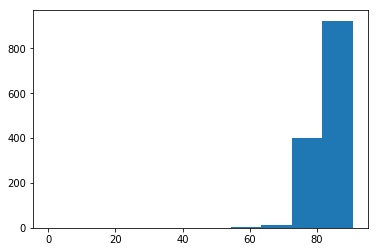

In [10]:
plt.hist(x = model_df['total_cup_points'])

**Looks like there is a 0 in the cup points**

In [11]:
## check the quantiles of the variab;e to make sure

model_df['total_cup_points'].quantile(q = [0, 0.25, 0.5, 0.75, 1])

0.00     0.0000
0.25    81.1025
0.50    82.5000
0.75    83.6700
1.00    90.5800
Name: total_cup_points, dtype: float64

Let's remove that value since it doesn't make sense and is probably an error in data entry.

In [12]:
model_df = model_df[model_df['total_cup_points'] > 0]

In [45]:
## Create 4 cup point bins, based on quantiles, and remove the cup points column

model_df['Cup_Point_Bin'] = pd.qcut(model_df['total_cup_points'], 4)
model_df_final = model_df.drop('total_cup_points', axis = 1)

In [46]:
model_df_final.head()

,species,country_of_origin,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,Cup_Point_Bin
0,Arabica,Ethiopia,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,0.12,"(83.67, 90.58]"
1,Arabica,Ethiopia,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,0.12,"(83.67, 90.58]"
2,Arabica,Guatemala,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,0.00,"(83.67, 90.58]"
3,Arabica,Ethiopia,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,0.11,"(83.67, 90.58]"
4,Arabica,Ethiopia,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,0.12,"(83.67, 90.58]"


In [47]:
## How many observations in each bin?

model_df_final.groupby(['Cup_Point_Bin']).size()

Cup_Point_Bin
(59.829, 81.17]    349
(81.17, 82.5]      328
(82.5, 83.67]      345
(83.67, 90.58]     315
dtype: int64

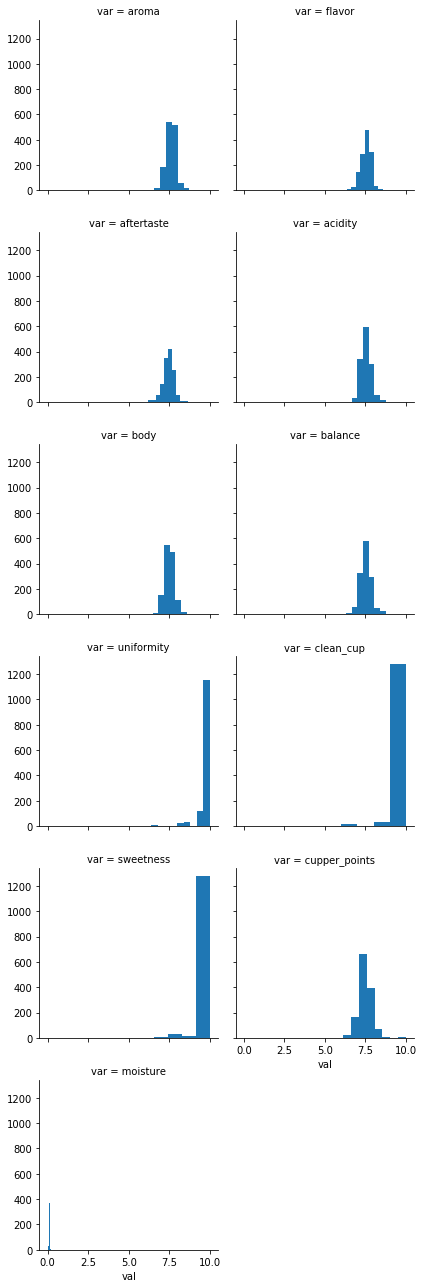

In [48]:
## get continuous data into long format from wide format
s = pd.DataFrame(model_df_final.loc[:, 'aroma':'moisture'].stack())
s['var'] = s.index.get_level_values(1)
s = s.rename(columns = {0:'val'})

## plot facet of data
plot_grid = sns.FacetGrid(s, col = 'var', col_wrap = 2)
plot_grid.map(plt.hist, "val")


## Random Forest Classifier

**Train/Test Split**

In [49]:
from sklearn.model_selection import train_test_split

Before splitting the data we need to set the species and country_of_origin columns to dummy variables using one-hot encoding.

In [50]:
## one-hot encode both variables
model_df_final = pd.get_dummies(model_df_final,
                               columns = ['species', 'country_of_origin'])

In [70]:
## get predictors

X = model_df_final.drop('Cup_Point_Bin', axis = 1)

## get outcome variable

y = model_df_final['Cup_Point_Bin']

# Transform 'y' variable since random forest in sklearn needs the outcome in an array of numbers

from sklearn import preprocessing

y = pd.factorize(y)[0]
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)


## Split data into training and testing splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=7945)


**Set up the random forest classifier**

In [71]:
## Set model
fit_coffee = RandomForestClassifier(n_estimators = 1000,
                                   criterion = 'gini',
                                   max_features = 4)

## Apply model to training data
fit_coffee.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Model Performance

In [73]:
## load necessary functions from the sklearn package

from sklearn.metrics import classification_report, confusion_matrix

In [78]:
# Make Predictions on the test data

pred_test = fit_coffee.predict(X_test)

In [79]:
# confusion matrix

print(confusion_matrix(y_test, pred_test))
print('\n')
print(classification_report(y_test, pred_test))

[[ 80  10   0   0]
 [  4 100   5   0]
 [  3  13  81   1]
 [  1   1   6  97]]


             precision    recall  f1-score   support

          0       0.91      0.89      0.90        90
          1       0.81      0.92      0.86       109
          2       0.88      0.83      0.85        98
          3       0.99      0.92      0.96       105

avg / total       0.90      0.89      0.89       402

